In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
from pandarallel import pandarallel

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [3]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'protein_coding'
obs_col = 'sample'

mouse_ab = '../../mouse/lr_bulk/talon/mouse_talon_abundance.tsv'
mouse_filt_ab = '../../mouse/lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
mouse_read_annot = '../../mouse/lr_bulk/talon/mouse_talon_read_annot.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'
mouse_meta = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_t_metadata = '../../mouse/refs/cerberus/vM25_transcript_metadata.tsv'
mouse_ver = 'vM25_cerberus'

In [5]:
def plot_major_iso_simplex(h5, gene):
    ca = cerberus.read(h5)
    
    # plotting settings
    c_dict, order = get_biosample_colors()
    c_dict[np.nan] = 'k'
    mm_tissues = ['adrenal gland', 'heart',
                  'muscle', 'brain', 'pgp1_excite_neuron',
                  'pgp1_astro', 'h9_osteocyte']
    mmap = {'v40': '*', 'v29': 'x', 'obs_det': '^', 'cerberus': '2', 'obs_major': '^'}
    subset = {'source': ['v40', 'obs_det', 'sample_major']}
    
    fname = f'figures/simplex_{gene.lower()}_major.pdf'
    
    df = ca.plot_simplex(gene=gene,
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset={'source': ['v40', 'obs_det', 'sample_major']},
            size_scale=0.2,
            fname=fname)    

In [22]:
def plot_obs_obs_major_density_simplex(h5, gene):
    
    ca = cerberus.read(h5)
    
    # sample_det
    c_dict, order = get_biosample_colors()
    c_dict[np.nan] = 'k'
    mmap = {'v40': '*', 'v29': 'x', 'obs_det': '^', 'cerberus': '2', 'sample_det_centroid': 's'} 
    subset = {'source': ['v40', 'obs_det', 'sample_det']}
    fname=f'figures/simplex_{gene.lower()}_det.pdf'
    df = ca.plot_simplex(top='splicing_ratio', 
                gene=gene,
                hue='sample',
                cmap=c_dict,
                density=True,
                density_scale=50,
                density_cmap='Purples',
                size='gene_tpm', 
                log_size=True,
                sectors=True,
                marker_style='source',
                mmap=mmap,
                legend=False,
                jitter=True,
                subset=subset,
                size_scale=0.2,
                fname=fname)
    
    
    # sample_major
    mmap = {'v40': '*', 'v29': 'x', 'obs_major': '^', 'cerberus': '2', 'sample_det_centroid': 's'} 
    subset = {'source': ['v40', 'obs_major', 'sample_major']}
    fname=f'figures/simplex_{gene.lower()}_major.pdf'
    df = ca.plot_simplex(top='splicing_ratio', 
                gene=gene,
                hue='sample',
                cmap=c_dict,
                density=True,
                density_scale=50,
                density_cmap='Purples',
                size='gene_tpm', 
                log_size=True,
                sectors=True,
                marker_style='source',
                mmap=mmap,
                legend=False,
                jitter=True,
                subset=subset,
                size_scale=0.2,
                fname=fname)

## ELN major transcripts simplex

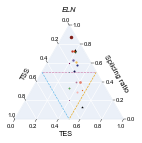

In [7]:
plot_major_iso_simplex(cerberus_h5, 'ELN')

## CTCF major transcripts simplex

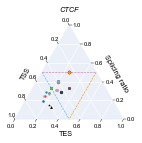

In [8]:
plot_major_iso_simplex(cerberus_h5, 'CTCF')

## ELN browser plots

In [5]:
sg = swan.read(swan_file)
ca = cerberus.read(cerberus_h5)

Read in graph from ../../lr_bulk/cerberus/swan/swan_meta.p


small text size: 20.3
big text size: 17.571194762684122


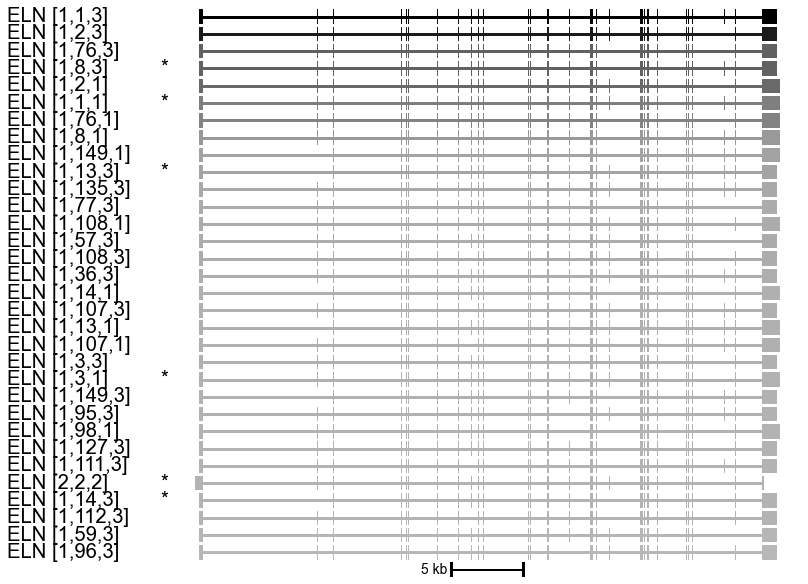

In [7]:
gene = 'ELN'
obs_col = 'sample'
obs_condition = 'lung'
ax, tpm_df = plot_browser_isos(ca, sg, gene,
                                         obs_col, obs_condition,
                                         filt_ab, major_isos,
                                         h_space=0.24,
                                         h=0.2,
                                         major=True)
fname = 'figures/{}_{}_major_isos_browser.pdf'.format(gene.lower(), obs_condition)
plt.savefig(fname, dpi=500)

## CTCF browser plots

small text size: 20.3
big text size: 17.571194762684122


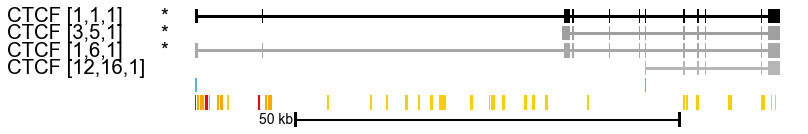

In [9]:
gene = 'CTCF'
obs_col = 'sample'
obs_condition = 'lung'
ax, tpm_df = plot_browser_isos(ca, sg, gene,
                                         obs_col, obs_condition,
                                         filt_ab, major_isos,
                                         h_space=0.24,
                                         h=0.2, 
                                         add_tss=True, add_ccre=True, major=True)

fname = 'figures/{}_{}_major_isos_browser.pdf'.format(gene.lower(), obs_condition)
plt.savefig(fname, dpi=500)

## E4F1 obs vs obs major density simplices

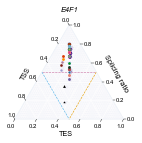

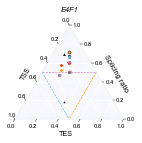

In [24]:
plot_obs_obs_major_density_simplex(cerberus_h5, 'E4F1')

## Overall observed vs. observed major sankey

In [29]:
def sector_sankey(h5,
                  source1, source2,
                  ofile,
                  ver=None,
                  gene_subset=None):
    
    ca = cerberus.read(h5)
    
    # limit to sources
    df1 = ca.triplets.loc[ca.triplets.source==source1].copy(deep=True)
    df2 = ca.triplets.loc[ca.triplets.source==source2].copy(deep=True)
                
    # merge on gitd
    df = df1.merge(df2, how='outer', on='gid', suffixes=(f'_{source1}', f'_{source2}'))
    
    # limit to gene subset
    if gene_subset:
        gene_df, _, _ = get_gtf_info(how='gene', ver=ver)
        gene_df['gid_stable'] = cerberus.get_stable_gid(gene_df, 'gid')
        df = df.merge(gene_df[['gid_stable', 'biotype_category']],
                          how='left', left_on='gid', right_on='gid_stable')
        df = df.loc[df.biotype_category == gene_subset]
        df.drop(['biotype_category', 'gid_stable'], axis=1, inplace=True)
        
    # count numer of things
    gb_cols = [f'sector_{source1}', f'sector_{source2}']
    keep_cols = gb_cols + ['gid']
    df = df[keep_cols].groupby(gb_cols).count().reset_index()
    
    fig = plot_sankey(df,
                      source='sector_obs_det',
                      sink='sector_obs_major',
                      counts='gid',
                      color='sector',
                      title='')
    h = 700
    w = 1.8792590838529746*h
    pio.write_image(fig, ofile, width=w, height=h)
    
    return df

{'tss': '#56B4E9', 'splicing': '#CC79A7', 'tes': '#E69F00', 'simple': '#000000', 'mixed': '#b7b7b7'}
{'label': ['TSS', 'Splicing', 'TES', 'Mixed', 'Simple', 'TSS', 'Splicing', 'TES', 'Mixed', 'Simple'], 'color': ['#56B4E9', '#CC79A7', '#E69F00', '#b7b7b7', '#000000', '#56B4E9', '#CC79A7', '#E69F00', '#b7b7b7', '#000000'], 'x': [0.01, 0.01, 0.01, 0.01, 0.01, 1.0, 1.0, 1.0, 1.0, 1.0], 'y': [0.01, 0.25, 0.5, 0.75, 1.0, 0.01, 0.25, 0.5, 0.75, 1.0]}


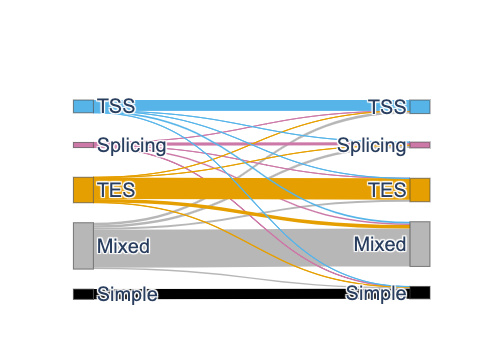

In [30]:
df = sector_sankey(cerberus_h5, 
              'obs_det', 
              'obs_major',
              'figures/obs_obs_major_sankey.pdf',
              ver=ver,
              gene_subset=gene_subset)

In [31]:
# conserved sectors
df['same'] = df.sector_obs_major == df.sector_obs_det
temp = df[['gid', 'same']].groupby('same').sum().reset_index()
n = temp.loc[temp.same == True, 'gid'].values[0]/temp.gid.sum()
print('{:.2f}% of protein coding genes are in the same sector b/w obs and obs major'.format(n*100))

83.68% of protein coding genes are in the same sector b/w obs and obs major


In [39]:
# genes that move from mixed to a simplex corner
n = len(df.index)
n_num = len(df.loc[(df.sector_obs_det=='mixed')&\
                   (df.sector_obs_major.isin(['TSS', 'splicing', 'TES']))].index)
print(f'{(n_num/n)*100:.2f}% of protein coding genes go from mixed -> TSS/splicing/TES')

4.76% of protein coding genes go from mixed -> TSS/splicing/TES


In [40]:
# total number of genes / obs_det sector
total_det = df[['sector_obs_det', 'gid']].groupby('sector_obs_det').sum().reset_index()
total_det.rename({'gid': 'total'}, axis=1, inplace=True)
total_det.head()

,sector_obs_det,total
0,mixed,8125
1,simple,1789
2,splicing,900
3,tes,4464
4,tss,2245


In [54]:
# genes that retain their sector per sector
df['same'] = df.sector_obs_major == df.sector_obs_det
temp = df[['gid', 'same', 'sector_obs_major']].groupby(['same', 'sector_obs_major']).sum().reset_index()
temp.rename({'sector_obs_major':'sector'}, axis=1, inplace=True)
temp.loc[temp.same==True]

temp2 = df[['gid', 'sector_obs_det']].groupby(['sector_obs_det']).sum().reset_index()
temp2.rename({'gid': 'n_obs_det',
              'sector_obs_det': 'sector'}, axis=1, inplace=True)

temp = temp.merge(temp2, on='sector', how='outer')
temp['perc'] = (temp['gid']/temp['n_obs_det'])*100
temp.loc[temp.same==True]

,same,sector,gid,n_obs_det,perc
1,True,mixed,6645,8125,81.784615
3,True,simple,1789,1789,100.000000
5,True,splicing,558,900,62.000000
7,True,tes,3759,4464,84.206989
9,True,tss,1912,2245,85.167038


In [41]:
# total number of genes / obs_major sector
total_det = df[['sector_obs_major', 'gid']].groupby('sector_obs_major').sum().reset_index()
total_det.rename({'gid': 'total'}, axis=1, inplace=True)
total_det.head()

,sector_obs_major,total
0,mixed,7832
1,simple,2176
2,splicing,1019
3,tes,4112
4,tss,2384


## Transcript triplets labelled in figures

In [ ]:
ca = cerberus.read(cerberus_h5)

In [32]:
ca.triplets.loc[(ca.triplets.source=='sample_major')&\
                (ca.triplets['sample']=='lung')&\
                (ca.triplets.gname.isin(['ELN']))][['n_tss', 'splicing_ratio', 'n_tes', 'n_ic', 'n_iso']]

,n_tss,splicing_ratio,n_tes,n_ic,n_iso
77904,2.0,8.4,3.0,21.0,32.0


In [33]:
ca.triplets.loc[(ca.triplets.source=='sample_major')&\
                (ca.triplets['sample']=='h9_chondro')&\
                (ca.triplets.gname.isin(['ELN']))][['n_tss', 'splicing_ratio', 'n_tes', 'n_ic', 'n_iso']]

,n_tss,splicing_ratio,n_tes,n_ic,n_iso
24501,1.0,21.333333,2.0,32.0,57.0


In [34]:
ca.triplets.loc[(ca.triplets.source=='sample_major')&\
                (ca.triplets['sample']=='lung')&\
                (ca.triplets.gname.isin(['CTCF']))][['n_tss', 'splicing_ratio', 'n_tes', 'n_ic', 'n_iso']]

,n_tss,splicing_ratio,n_tes,n_ic,n_iso
79678,3.0,2.0,1.0,4.0,4.0


In [35]:
ca.triplets.loc[(ca.triplets.source=='obs_det')&\
                (ca.triplets.gname.isin(['E4F1']))][['n_tss', 'splicing_ratio', 'n_tes', 'n_ic', 'n_iso']]

,n_tss,splicing_ratio,n_tes,n_ic,n_iso
11578,4.0,3.714286,3.0,13.0,13.0


In [36]:
ca.triplets.loc[(ca.triplets.source=='obs_major')&\
                (ca.triplets.gname.isin(['E4F1']))][['n_tss', 'splicing_ratio', 'n_tes', 'n_ic', 'n_iso']]

,n_tss,splicing_ratio,n_tes,n_ic,n_iso
11578,2.0,6.666667,1.0,10.0,10.0


## Detected ELN isoforms

In [38]:
ca.triplets.loc[(ca.triplets.source=='sample_det')&\
                (ca.triplets['sample']=='h9_chondro')&\
                (ca.triplets.gname.isin(['ELN']))][['n_tss', 'splicing_ratio', 'n_tes', 'n_ic', 'n_iso']]

,n_tss,splicing_ratio,n_tes,n_ic,n_iso
24501,2.0,54.0,3.0,135.0,278.0
